In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [22]:
df = pd.read_csv('CC General.csv').dropna()
df = df.iloc[:, 1:]
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


## Gaussian Mixture Model

Text(0.5, 0, 'Number of Components/Cluster')

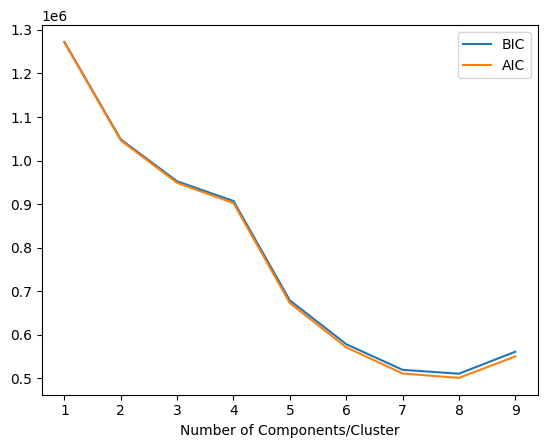

In [23]:
#Finding Optimal Number of Clusters
#Preparation
n_components = np.arange(1, 10)

models = [GaussianMixture(n_components = n,
                         random_state = 1502).fit(df) for n in n_components]

#Plot
plt.plot(n_components,
        [m.bic(df) for m in models],
        label = 'BIC')
plt.plot(n_components,
        [m.aic(df) for m in models],
        label = 'AIC')

plt.legend()
plt.xlabel('Number of Components/Cluster')

## Interpretation

In [24]:
model = GaussianMixture(n_components = 8,
                       random_state = 1502).fit(df)

In [25]:
#Predict Cluster for each Customer
cluster = pd.Series(model.predict(df))

In [26]:
df['cluster'] = cluster
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,NaN
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,NaN
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,NaN
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,NaN


In [27]:
df.cluster.value_counts()

cluster
5.0    2687
0.0    1821
2.0    1241
6.0    1168
7.0     541
1.0     417
3.0     399
4.0      65
Name: count, dtype: int64

In [28]:
#Interpretation
pd.DataFrame(model.means_,
            columns = list(df.iloc[:,:-1].columns))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2216.493626,0.911168,0.000000,0.000000,0.000000,1995.334208,0.000000,0.000000,0.000000,0.279090,6.290452,0.000000,4042.158778,1595.081905,742.647352,0.032049,11.358915
1,1512.052090,0.896221,410.624849,0.000000,410.624849,1528.828375,0.586597,0.000000,0.543342,0.190406,3.791186,8.173383,3481.900139,2153.697524,1075.120511,0.131692,11.154169
2,1074.292514,1.000000,2261.108895,1214.725947,1046.382948,0.000000,1.000000,0.433473,0.843784,0.000000,0.000000,39.284452,5294.492928,2074.872148,579.889688,0.337363,12.000000
3,2714.751681,0.912727,1144.459577,787.770432,356.689146,3607.481347,0.498529,0.294195,0.287212,0.370259,12.348824,15.547329,5087.370418,3362.427356,3516.947007,0.067110,9.721043
4,4882.438946,0.920446,11959.671207,7995.431185,4004.352011,504.603037,0.745168,0.408734,0.588193,0.055201,1.285251,81.311938,10940.748183,12637.435778,3499.926924,0.274352,11.713447
5,458.767323,0.785869,719.467814,414.694867,304.772948,0.000000,0.527759,0.179861,0.367318,0.000000,0.000000,9.917012,3844.317602,872.571086,226.676042,0.241040,11.460593
6,3334.630338,1.000000,958.189722,613.060875,345.128848,1510.525954,0.549620,0.286628,0.366592,0.253343,5.891148,16.182865,5433.700824,1565.406272,1742.250160,0.000000,12.000000
7,1460.857107,0.894974,2373.699188,1601.997161,771.702027,1450.418945,0.632581,0.392633,0.435656,0.206332,4.944838,29.700574,5320.882064,4040.770016,734.843401,0.197634,12.000000


In [ ]:
#Name the Segments
#Cluster 0: Lower Class
#Cluster 1: Working Class
#Cluster 2: Lower Middle Class
#Cluster 3: Middle Class
#Cluster 4: Upper Middle Class
#Cluster 5: Upper Class
#Cluster 6: Wealthy
#Cluster 7: Affluent